<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Time Series Modeling
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 4: Topic 40</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

So far, seen how series decompose into multiple components:

- trend
- seasonal
- **autocorrelative** 
- **noise terms**

Modeling residuals after appropriate differencing/decomposition and after achieving stationarity.

There are two general model classes for $y_t$ (our residual series at time $t$): based on:
- correlations with previous time steps (autocorrelative)
- estimation of direct influence of noise from previous time steps on (noise terms)

#### AR(p) models

Based on correlations with previous time steps (autocorrelative) and noise $\epsilon_t$ at current time.

$$ y_t = \phi_1 y_{t-1} + \phi_2y_{t-2} + \phi_p y_{t - p} + \epsilon_t $$ 

Modeling as sequence of autocorrelative effects out to order $p$.

- Momentum
- Mean reversion

#### MA(q) models

Series model as sum of influence of noise kicks/impulses over the past $q$ time-steps

$$ y_t =  \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t - q} $$

There is no notion of momentum / autocorrelative effects here:


#### MA models

- Series evolution is determined largely by noise kicks/forces.

Think of a ball moving in a highly viscous fluid with infinite drag:

- The ball has no momentum (infinite drag)...just motion resultant directly from force kicks on the ball.


$$ y_t =  \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t - q} $$

- MA models: 
    - time evolution of series mean best modeled by a weighted smoothing or *moving average* over previous noise terms.
    

#### Identifying pure AR vs. MA models via the ACF and PACFs

<img src = "Images/ACFPACFARMA.png"  width = 400>

Using the ACF and PACF its usually possible to identify whether we have a pure AR or pure MA model.
- The ACF/PACF can be used to identify the order of the model (if pure AR or pure MA).


We've already seen what we might expect for an AR(p) model:

- Look at p = 2 order model.

Import necessary libraries for generation and ACF/PACF plotting

In [1]:
from statsmodels.tsa.arima_process import arma_generate_sample

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
n = 500
ar = np.r_[1, .6, -.3]
ma = np.r_[1, 0]

ar2_data = arma_generate_sample(ar=ar, ma=ma,
                                nsample=n) 


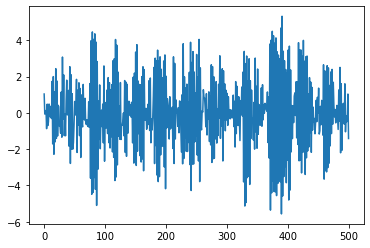

In [3]:
plt.plot(ar2_data)

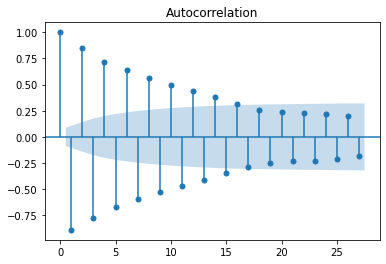

In [4]:
plot_acf(ar2_data)
plt.show()

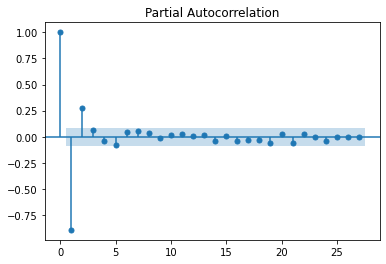

In [5]:
plot_pacf(ar2_data)
plt.show()

The ACF tails geometrically (or alternating geometric). Model order can be read off by PACF.

Now let's take a look at what a PACF/ACF for an MA(1) model:

- generate samples for an MA(1) model

In [6]:
n = 500
ar = np.r_[1, 0]
ma = np.r_[1, -0.8]
ma1_data = arma_generate_sample(ar=ar, ma=ma, nsample=n) 

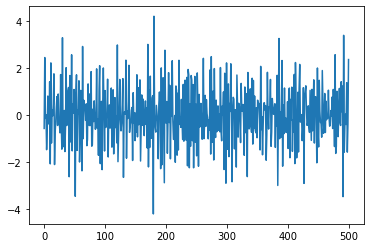

In [7]:
plt.plot(ma1_data)

Evalute the ACF and PACF for an MA(1) model:

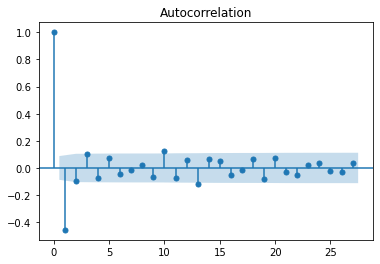

In [8]:
plot_acf(ma1_data)
plt.show()

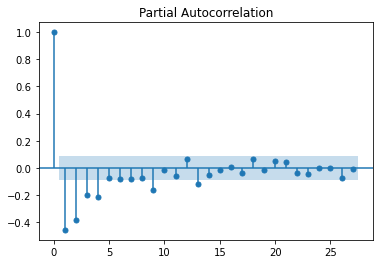

In [9]:
plot_pacf(ma1_data)
plt.show()

It's clear that while the PACF tails geometrically, now the ACF has non-zero lags out to the order $q$ of the MA model:
- i.e. the ACF can be used to read off the order of an MA model

Let's see what happens to the ACF when we increase the order to an MA(2) model:

In [10]:
n = 500
ar = np.r_[1, 0]
ma = np.r_[1, 0.8, 0.6]
ma2_data = arma_generate_sample(ar=ar, ma=ma, nsample=n) 


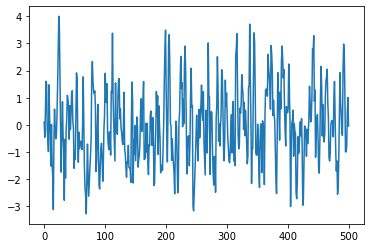

In [11]:
plt.plot(ma2_data)

The ACF/PACF for an MA(2) model:

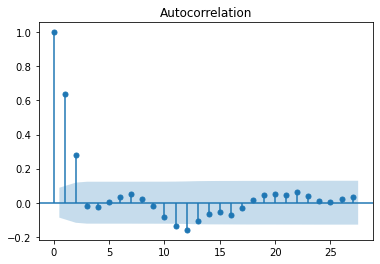

In [12]:
plot_acf(ma2_data)
plt.show()

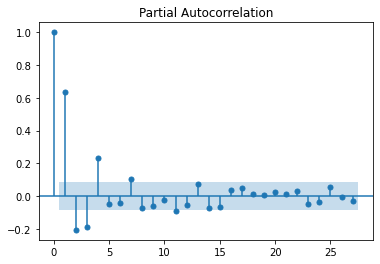

In [13]:
plot_pacf(ma2_data)
plt.show()

With MA models, its only reasonable to expect correlation with time steps at lags that the current time step is influenced by:

For an MA(2) model
- $y_{t}$ is influenced by noise terms out to lag 2 (i.e out to lag $\epsilon_{t-2}$). 
- Since $y_{t-2}$ is the earliest lag at which our series depends on $\epsilon_{t-2}$:
    - we potentially expect non-zero ACF out to lag 2 and zero after that.

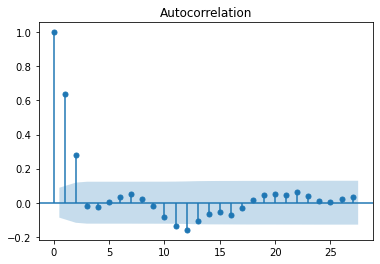

In [14]:
plot_acf(ma2_data)
plt.show()

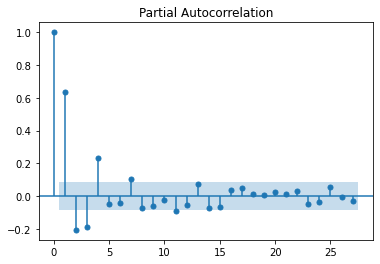

In [15]:
plot_pacf(ma2_data)
plt.show()

Sometimes we are lucky and we can model our differenced/stationarized series with pure AR models or pure MA models:

- these tend to be more straightforward in identifying via ACF/PACFs (although there are subtleties here still)

**Sometimes we are not so lucky**: the series is best model in terms of *both* autoregressive and moving average terms.

- i.e. a mixed model

#### ARMA(p,q) model

Yup, its just an AR and an MA model combined.

$$ y_t = \phi_1 y_{t-1} + \phi_2y_{t-2} + \phi_p y_{t - p}  \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t - k} + \epsilon_t$$ 

More explicitly: taking a stationarized (i.e. differenced/decomposed etc.) series $y_t$

Can we find coefficients $ \{\phi_i, \theta_i \} $

$$ y_t = \phi_1 y_{t-1} + \phi_2y_{t-2} + \phi_p y_{t - p} + \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t - q} $$ 

that models our series?

- $\phi_i$ measures the influence $y_{t-i}$ has on $y_t$.
- $\theta_i$ determines *direct* influence of a noise kick at time $t - i$: (i.e $\epsilon_{t-i}$) on the series $y_t$ at the current time time $t$.

You likely have a mixed model if your stationarized series has:
- geometric tailing on *both* the ACF and PACF.

**Unfortunately its not easy/possible to identify an ARMA model order by reading it off the ACF and PACF**

Let's look at the ACF and PACF of an ARMA(1,1) model.

In [336]:
n = 700
ar = np.r_[1, .6]
ma = np.r_[1, -.8]
arma11_data = arma_generate_sample(ar=ar, ma=ma, 
                                   nsample=n) 


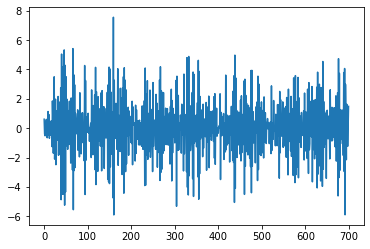

In [337]:
plt.plot(arma11_data) 

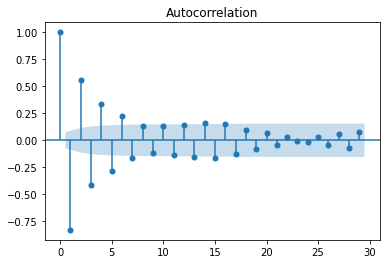

In [338]:
plot_acf(arma11_data)
plt.show()

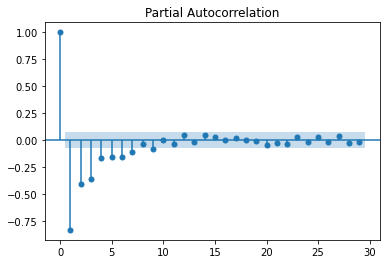

In [339]:
plot_pacf(arma11_data)
plt.show()

This is an ARMA(1,1) model:
- ACF and PACF both exhibit geometric decay
- can't read off the model order by looking at the plots.

Usually when faced with a model where ACF/PACF don't point to pure AR or MA processes:
- time to go to modeling using mixed ARMA orders
- analyze residuals of model to assess model fitness.

In practice, we call on a full ARIMA model:
- ARMA is a special case.

#### ARIMA(p,d,q) model

- p: autoregressive order
- d: number of differencing operations 
- q: moving average order

#### ARIMA(p,d,q) model

- p: autoregressive order
- d: number of differencing operations 
- q: moving average order

- when we see that the data needs one differencing operation
- after differencing, we see from the ACF/PACF its an AR(1) process

Can feed in the **raw, undifferenced, non-stationary** time series and call in: AR(1, 1, 0)
- differencing order is 1
- AR order is 1

In general:
- assess how many times ($d$) that differencing is required on time series to get stationarity.
- **Undifferenced data** fed into ARIMA(p,d,q) models where $d$ has already been established.

Let's model on a concrete series:

- our ARMA(1,1) series
- Note: series is already stationary

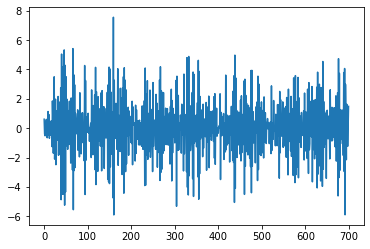

In [340]:
plt.plot(arma11_data)
plt.show()

In [341]:
adfuller(arma11_data)

(-13.898453973986886,
 5.793223263930558e-26,
 8,
 691,
 {'1%': -3.4398489271901713,
  '5%': -2.8657317673059395,
  '10%': -2.569002221596252},
 1863.8934773110043)

Can reject the null that series has a unit root (i.e. is non-stationary).

**Series is stationary. No differencing is required**

Make the necessary imports.

In [342]:
from statsmodels.tsa.arima.model import ARIMA

Also let's keep the last 20 points for a test set, the rest for train:

In [343]:
n_test = 20
train_arma11 = arma11_data[:-n_test]
test_arma11 = arma11_data[-n_test::]
print(train_arma11.shape, test_arma11.shape)

(680,) (20,)


The ARIMA model class operates similarly to the OLS class:

Since the data doesn't require differencing: $d = 0$.

We'll see the results when we use the correct model ARIMA(1,0,1) which is ARMA(1,1).

In [344]:
 # order is (p,d,q) tuple
model = ARIMA(train_arma11, order = (1, 0, 1))
results = model.fit()

The results object has useful attributes and methods for evaluating model fitness,

In [345]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  680
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -923.624
Date:                Thu, 12 Jan 2023   AIC                           1855.249
Time:                        22:44:54   BIC                           1873.337
Sample:                             0   HQIC                          1862.250
                                - 680                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.005      0.834      0.404      -0.006       0.014
ar.L1         -0.6716      0.031    -21.616      0.000      -0.733      -0.611
ma.L1         -0.7672      0.027    -28.813      0.000      -0.819      -0.715
sigma2         0.8827      0.049     17.968      0.000       0.786       0.979
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.96   Prob(JB):                         0.91
Heteroskedasticity (H):               0.95   Skew:                             0.01
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Important metrics here besides the coefficients and their p-values:

- AIC (Akaike Information Criterion)
- Ljung-Box Statistic and p-value Prob(Q)

**AIC definition**

$$ AIC = L + K $$ where $L = \frac{\sum_i(y_i - \hat{y}_i)^2/\sigma_y^2}{N}$ is least squared objective and $K$ is number of ARMA terms used.

Penalizes model complexity while minimizing residual errors.

The Ljung-Box test provides test on ACF/PACF of residual (data - model):
- $H_0$: ACF/PACF components are zero at finite non-zero lag.
- $H_A$: ACF/PACF components are different from zero at finite non-zero lag.

High p-values are goodt: cannot reject the null that residual is white noise.

Other useful attributes are:
- .aic (get the AIC score)

AIC will be useful for model selection:
- get model orders that fit the data well (low SSE)
- have low model omplexity

In [346]:
results.aic

1855.2488460812315

The lower the better.

- Can extract the AR and MA coefficients:
    - .params

In [347]:
dict(zip(results.param_names, results.params))

{'const': 0.004225343110752709,
 'ar.L1': -0.6716392289882456,
 'ma.L1': -0.7671596653271525,
 'sigma2': 0.8827237654032839}

A quick visualization of residual distribution:
- is it white noise?

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


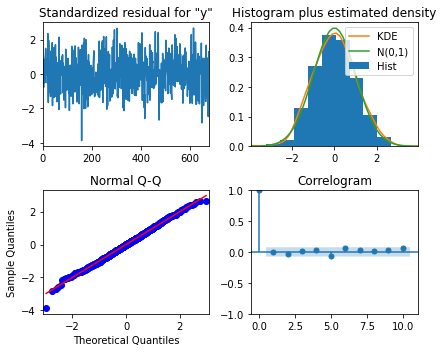

In [348]:
results.plot_diagnostics(figsize = (6,5))
plt.tight_layout()
plt.show()

- QQ plot is ecdf plot of scaled data vs theoretical cdf of normal distribution.
- Correlogram is ACF.

Can also access the residual series (.resid) directly:
- useful for more carefully analyzing the residuals
- Box-Jenkins ARIMA order determination: fit another ARIMA model to residual  
    - look at first model and residual model
    - some math and/or educated guessing to try a new model order

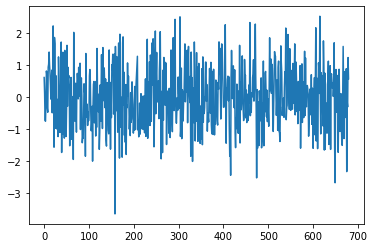

In [349]:
residuals_arma11 = results.resid
plt.plot(residuals_arma11)

- Use ACF/PACF to determine model order (pure AR or MA or white noise)
- White noise: no further modeling needed

Just to show you if we used the wrong model order:
- We will try an AR(1) model
- Our true series has MA terms

In [350]:
 # order is (p,d,q) tuple
model_bad = ARIMA(train_arma11, order = (1, 0, 0))
results_2 = model_bad.fit()

In [351]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  680
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1052.987
Date:                Thu, 12 Jan 2023   AIC                           2111.973
Time:                        22:44:59   BIC                           2125.539
Sample:                             0   HQIC                          2117.224
                                - 680                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.024      0.201      0.841      -0.042       0.052
ar.L1         -0.8329      0.022    -38.426      0.000      -0.875      -0.790
sigma2         1.2936      0.069     18.638      0.000       1.158       1.430
===================================================================================
Ljung-Box (L1) (Q):                  77.13   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


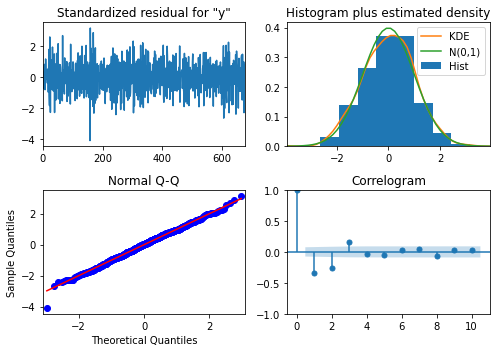

In [352]:
results_2.plot_diagnostics(figsize = (7,5))
plt.tight_layout()
plt.show()

The AIC is much higher. The residual has correlation structure.

A closer look at the residual might tell us what kind of process captures what we haven't accounted for:

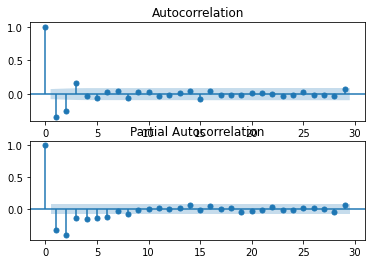

In [353]:
fig, ax = plt.subplots(2,1)
plot_acf(results_2.resid, ax = ax[0])
ax[1] = plot_pacf(results_2.resid, ax = ax[1])
plt.show()

Residual Looks like an MA(2) or possibly MA(3) process:
- So AR(1) model + MA(2) model (or MA effects)
- or fit, in our case, an ARIMA(1,0,2) model: which gets us close to the correct order
- Whatever the case telling us to try increasing the MA order. Try model, analyze residuals.

**Repeat**

The Box-Jenkins method is somewhat laborious.

- automated selection of order (p,d,q) based on the AIC may help us out a lot:
- get us something that fits data, lowers model complexity


Let's do some model selection based on the AIC:
- could write for loops over p,d,q and zone in on best model(s) by AIC
- then Box-Jenkins this model **OR** start with evaluating model on unseen data (cross-validation)
- pmdarima is a nice package that will do AIC-based scanning for us easily and provides nice interface

In [354]:
import pmdarima as pm
from pmdarima import model_selection

In [355]:
modl = pm.auto_arima(train_arma11, start_p=1, start_q=4,
                     max_p=4, max_q=4, d= 0, trace=True, stepwise=True, suppress_warnings=True,
                     error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1855.307, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2913.365, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2111.973, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2200.509, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2911.367, Time=0.02 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=1874.947, Time=0.43 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1853.653, Time=0.24 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1900.743, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1857.249, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1855.077, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1952.162, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1855.339, Time=0.58 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=1856.826, Time=0.76 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1852.295, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0]          

So the best model according to is a 1,0,1 ARIMA model:

In [356]:
best_mod = ARIMA(train_arma11, order = (1,0,1))
result_best = best_mod.fit()

Original model was ARIMA(1,0,1) with $\phi_1 = -0.6$ and $\theta_1 = -0.8$

In [357]:
result_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  680
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -923.624
Date:                Thu, 12 Jan 2023   AIC                           1855.249
Time:                        22:45:09   BIC                           1873.337
Sample:                             0   HQIC                          1862.250
                                - 680                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.005      0.834      0.404      -0.006       0.014
ar.L1         -0.6716      0.031    -21.616      0.000      -0.733      -0.611
ma.L1         -0.7672      0.027    -28.813      0.000      -0.819      -0.715
sigma2         0.8827      0.049     17.968      0.000       0.786       0.979
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.96   Prob(JB):                         0.91
Heteroskedasticity (H):               0.95   Skew:                             0.01
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In this case, its the true model, but in general there may be room for improvement:
- Evaluate residuals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


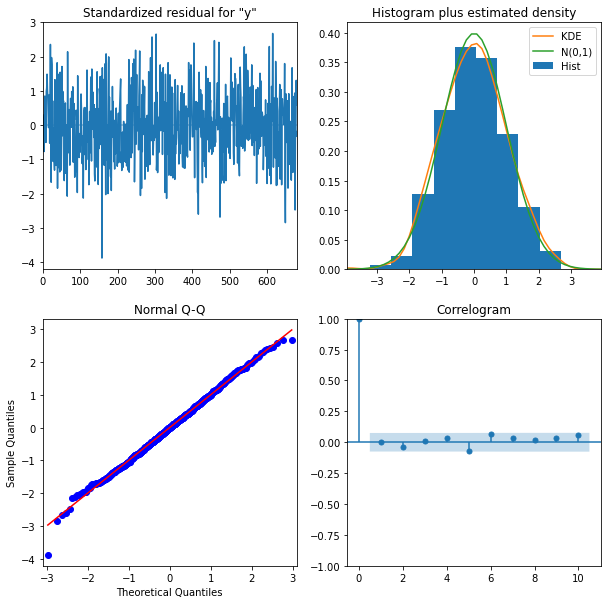

In [358]:
result_best.plot_diagnostics(figsize = (10,10))
plt.show()

Also:
- if ACF/PACF of residual suggests modifying order
- scan AUTO_ARIMA model trace for models that have good AIC and align with residual analysis on model with best AIC

Now, its a useful thing to evaluate the performance and predict in-sample:

#### .predict() method
- useful for in-sample comparison
- first argument is start index or start datetime
- second argument is end index or end datetime

In [456]:
n_len = train_arma11.shape[0]


insamp_pred = result_best.predict(0, n_len)

#get first 5 values in-sample
insamp_pred[0:5]

array([ 0.00422534, -0.50091081,  0.20831382,  0.82551004,  0.48896542])

Plotting the in-sample predictions:
- these are **one-step ahead** predictions at each time $t$
- assuming the true data up to a time $t-1$

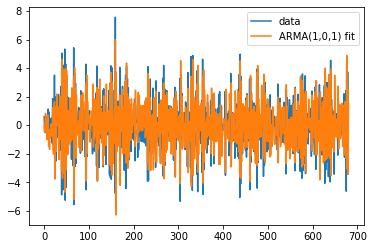

In [457]:
fig, ax = plt.subplots()
ax.plot(train_arma11, label = 'data')
ax.plot(insamp_pred, label = 'ARMA(1,0,1) fit')
ax.legend()

The model is clearly modeling the structure of the series and ARMA trends with mean reversion.

Out-of-sample forecasting can also be done using the .forecast() method:
- statsmodels has a separate set of methods for this:
    - forecast()
    - get_forecast()

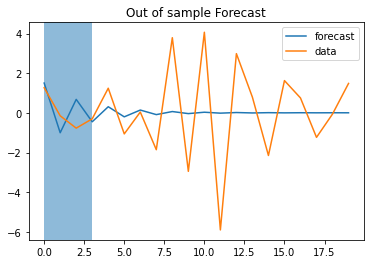

In [393]:
plt.plot(result_best.forecast(20), label = 'forecast')
plt.plot(test_arma11[0:20], label = 'data')
plt.axvspan(0,3, alpha = 0.5)
plt.title('Out of sample Forecast')
plt.legend()

The out of sample forecast only has a reasonable degree of fidelity out to a few time steps. 

- This really depends on the autocorrelation structure.

It's modeling the projected average: 
- initial mean reversion behavior
- then autocorrelation decays from last training point.

In [394]:
forecast = result_best.get_forecast(20) # returns an object
predmean = forecast.predicted_mean # the mean
pred_conf = forecast.conf_int() # this gets the 95% confidence interval

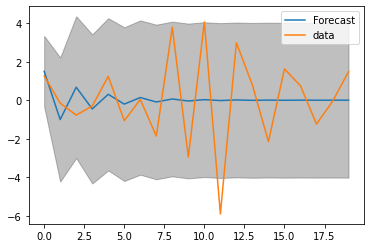

In [403]:
fig, ax = plt.subplots()
ax.plot(predmean, label='Forecast')
ax.fill_between(np.arange(len(predmean)),
                pred_conf[:, 0],
                pred_conf[:, 1], color='k', alpha=.25)
ax.plot(test_arma11[0:20], label = 'data')
ax.legend()
plt.show()

Note that the out of sample forecast:
- smaller confidence bands and showing mean reversion
- confidence bands expand out and ecay of autocorrelation structure as we get further from last training point
- confidence bands equilibriates: reflects the **fitted** Gaussian noise level.

For this series it might only make sense to do 3-step ahead **rolling forecast** predictions:
- this is not bad depending on the use case
- i.e. projecting inventory out to three days, etc.

In fact, ARIMA models often used to do just 1-step ahead **rolling forecasts**

- which can be done by ingesting new observations (via the .extend() method) 
- then .forecast()

### Modeling Flow

Let's take in a very simple dataset:
- create model to project shampoo sales

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


C:\Users\prave\AppData\Local\Temp/ipykernel_1052/4049392544.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


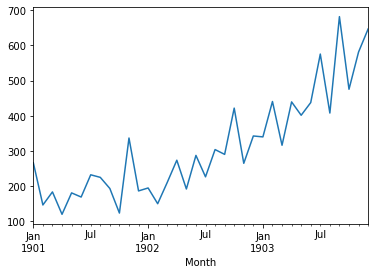

In [467]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('data/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

Definitely not stationary.

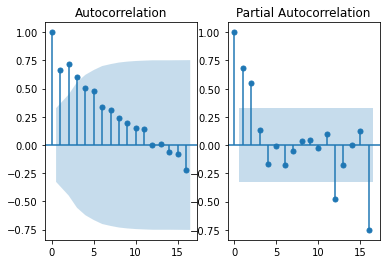

In [468]:
fig, ax = plt.subplots(1,2)
plot_acf(series, ax = ax[0])
plot_pacf(series, ax = ax[1])
plt.show()


In [470]:
adfuller(series)

(3.0601420836411815,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.99726442630316)

Let's difference this to see if we can make it stationary:
- this is just to understand the ARIMA model differencing order.

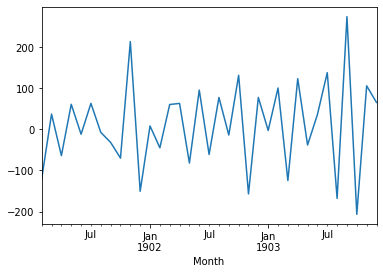

In [485]:
differenced_data = series.diff().dropna()
differenced_data.plot()
plt.show()

In [488]:
adfuller(differenced_data)

(-7.249074055553857,
 1.7998574141686703e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

OK looks not so bad. Looks like a primarily mean reverting series:

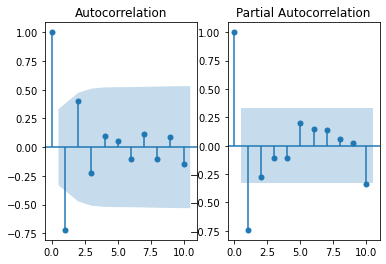

In [497]:
fig, ax = plt.subplots(1,2)
plot_acf(differenced_data, lags = 10, ax = ax[0])
plot_pacf(differenced_data, lags = 10, ax = ax[1])
plt.show()

Also looks stationary with posibility of being modeled by an ARIMA model. Something likely at first order.

Going to gridscan models to get the ARIMA p,q order, but let's use a differencing order $d$ = 1.

First let's leave a little chunk off the dataset for a test set.

In [503]:
train_shampoo = series[0:-4]
test_shampoo = series[-4::]

Now, run pmdarima to model select based off of AIC.

**Pass in the undifferenced train series**

In [502]:
modl = pm.auto_arima(train_shampoo, start_p=1, start_q=1,
                     max_p=5, max_q=5, d= 1, trace=True, stepwise=True, suppress_warnings=True,
                     error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=353.854, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=373.875, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=356.931, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=355.668, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=371.947, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=355.848, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=357.047, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=356.746, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.388 seconds


Instantiate/fit model using statsmodels:

**Pass in the undifferenced train series**

In [507]:
shampoo_model = ARIMA(train_shampoo, order = (1,1,1))
result_shampoo = shampoo_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [519]:
n_train = train_shampoo.shape[0]


insamp_shampoo = result_shampoo.predict(2, n_train)

#get first 5 values in-sample
insamp_shampoo[0:6]

1901-03-01    227.717511
1901-04-01    179.273372
1901-05-01    172.661795
1901-06-01    146.815901
1901-07-01    166.737589
1901-08-01    176.721636
Freq: MS, Name: predicted_mean, dtype: float64

This is pretty good. It's modeling trend and mean reversion behavior well on rolling next step forecasting well.

- Although ARIMA tends to have trouble reproducing the occasional larger amplitude spiking.

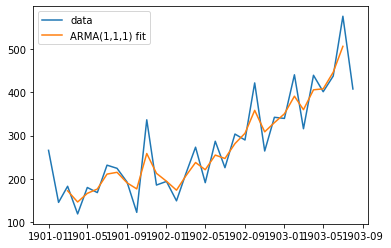

In [521]:
fig, ax = plt.subplots()
ax.plot(train_shampoo, label = 'data')
ax.plot(insamp_shampoo[0::].shift(-2), 
        label = 'ARMA(1,1,1) fit')
ax.legend()

Now let's look at the multi-step forecasting behavior purely out of sample:

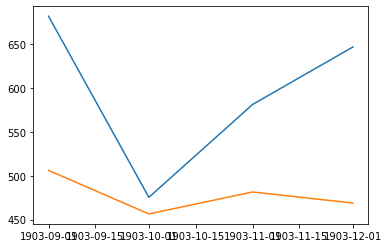

In [530]:
plt.plot(test_shampoo)
plt.plot(result_shampoo.forecast(4))

So it's doing semi-OK at getting the autocorrelative motion:
- but not the values
- has trouble with the trend

But based off an ARIMA(1,1,1) uni-variate model should we expect anything much better than next step trend prediction and a rough scale?

**How well/far ahead we can predict depends on autocorrelative structure of time series**